# First pratical work of Machine Learning on Graphs by Hanane Chenaf Anir and Mulapi Tita Ketsia

In [1]:
!pip install networkx

In [941]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

class Graphs:
    
    def __init__(self, list_of_successors, nodes, edges):
        '''
        Cette méthode permet d'initialiser des variables au moment
        de l'instanciation de la classe
        nodes : liste des nodes
        list_of_successors : la liste des successeurs
        edges : les couples avec leurs labels
        '''
        self.nodes = nodes.keys()
        self.successors = list_of_successors
        self.pos = nodes
        self.edges = edges
        self.edges_couple = edges.keys()
        self.edges_labels = edges.values()
        self.visual_graph = nx.Graph()
    
    def __str__(self):
        '''
        Cette méthode définit comment sont affichés les données
        '''
        return str(self.nodes)
    
    def build_graph(self):
        '''
        Cette méthode permet de construire un graphe
        '''
        try:
            self.visual_graph.add_nodes_from(self.nodes)
            tuples = list(self.edges.items())
            self.new_tuples_for_edges = []
            for t in tuples :
                c, w = t
                init, end = c
                self.new_tuples_for_edges.append((init,end,w))
                print(self.new_tuples_for_edges)
            self.visual_graph.add_weighted_edges_from(self.new_tuples_for_edges, weight='edges')
        except:
            self.error_exception(self.build_graph)
        return self.visual_graph
    
    def print_graph(self, visual_graph):
        '''
        Cette méthode permet d'afficher le graphe construit
        '''
        try:
            nx.draw_networkx(visual_graph,self.pos ,with_labels=True)
            nx.draw_networkx_edge_labels(visual_graph, self.pos,font_color='k')
            plt.title("Notre graphe")
            plt.show()
        except:
            self.error_exception(self.print_graph)
    
    def get_succesors_of_a_node(self, node):
        '''
        Cette fonction permet de renvoyer la liste des successeurs
        '''
        return self.successors[node]
    
    def get_nodes(self):
        '''
        Cette fonction permet de renvoyer les noeuds d'un graphe
        '''
        return self.nodes
    
    def get_graph_order(self):
        '''
        Cette méthode permet d'afficher l'ordre d'un graphe
        '''
        return len(self.nodes)
    
    def get_node_degree(self, node):
        '''
        cette méthode permet de renvoyer le degré d'un noeud
        '''
        occurence = 0
        for t in self.new_tuples_for_edges:
            if node in t:
                occurence += 1
        return occurence

    def get_edges_number(self):
        '''
        cette méthode renvoie le nombre d'arrêtes'''
        return len(self.edges_labels)
        
    def get_possible_number_of_edges_in_graph(self):
        '''
        retourne le nombre possible d'arrete dans un graphe non orienté !!!
        '''
        n = self.get_graph_order()
        return n*((n-1))/2
    
    def get_adjacent_matrix(self):
        '''
        retourne la matrice d'adjacence
        '''
        n = self.get_graph_order()
        A = np.zeros((n,n),dtype=int)
        names = [_ for _ in self.nodes]
        df = pd.DataFrame(A, index=names, columns=names)
        for node in self.successors:
            values = self.successors[node]
            for i in values:
                df[i][node] = 1
                df[node][i] = 1
        print(df)
        return df
        
    def get_incidence_matrix(self):
        '''
        retorune la matrice d'incidence
        '''
        n = self.get_graph_order()
        m = len(self.edges_labels)
        I = np.zeros((n,m),dtype=int)
        
        names_nodes = [_ for _ in self.nodes]
        names_edges = [_ for _ in self.edges_labels]
        df = pd.DataFrame(I, index=names_nodes, columns=names_edges)
        
        
        for node in self.nodes:
            for i in range(m):
                if node in self.new_tuples_for_edges[i] :
                    df[names_edges[i]][node]=1
        print(df)
        return df
    
    def get_laplacian_matrix(self):
        '''
        retourne la matrice laplacien et utilise la matrice d'incidence
        I : incident_matrix
        '''
        I = G.get_incidence_matrix()
        return I@I.transpose()
    
    def get_degree_matrix(self):
        '''
        retourne la matrice des degree
        '''
        n = self.get_graph_order()
        A = np.zeros((n,n),dtype=int)
        names = [_ for _ in self.nodes]
        df = pd.DataFrame(A, index=names, columns=names)
        
        for node in self.nodes :   
            df[node][node] = self.get_node_degree(node)
            
        print(df)
        return df
    
    def error_exception(self,func):
        '''
        cette méthode permet de gérer les exceptions
        func : c'est la fonction où s'est généré l'exception
        '''
        raise Exception("Il y'a une erreur dans la fonction", func)

In [942]:
dic = {
    
    "A" : ["B", "C"],
    "B" : [],
    "C" : ["D"],
    "D" : []    
    
}
nodes = { "A" : (0,0), "B" : (1,1), "C":(0.5,-1), "D":(1,-1)}

edges_couple = {("A","B"):"e1",("A","C"):"e2",("C","D"):"e3"}

In [943]:
G = Graphs(dic, nodes, edges_couple)

In [944]:
graph = G.build_graph()

[('A', 'B', 'e1')]
[('A', 'B', 'e1'), ('A', 'C', 'e2')]
[('A', 'B', 'e1'), ('A', 'C', 'e2'), ('C', 'D', 'e3')]


In [945]:
graph

# Afficher le graphe

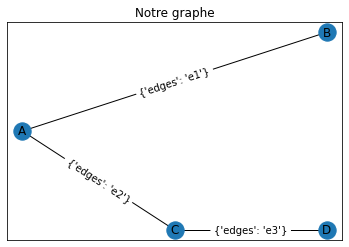

In [946]:
G.print_graph(graph)

# L'ordre du graphe

In [947]:
G.get_graph_order()

4

# Le degré d'un noeud

In [948]:
G.get_node_degree("A")

2

# Liste des successeurs d'un noeud

In [949]:
G.get_succesors_of_a_node("A")

['B', 'C']

# Liste des noeuds d'un graphe

In [950]:
G.get_nodes()

dict_keys(['A', 'B', 'C', 'D'])

# La taille du graphe

In [961]:
G.get_edges_number()

3

# Le nombre maximal et possible d'arrête que le graphe peut admettre (en focntion du nombre de node)

In [964]:
int(G.get_possible_number_of_edges_in_graph()) 
# int() car divisé par 2 pour un graphe non orienté renvoie donc un real !
# 6.0 !!

6

# La matrice d'adjacence

In [952]:
A = G.get_adjacent_matrix()

   A  B  C  D
A  0  1  1  0
B  1  0  0  0
C  1  0  0  1
D  0  0  1  0


# La matrice d'incidence

In [953]:
I = G.get_incidence_matrix()

   e1  e2  e3
A   1   1   0
B   1   0   0
C   0   1   1
D   0   0   1


# La matrice de Laplacien

In [954]:
L = G.get_laplacian_matrix()

   e1  e2  e3
A   1   1   0
B   1   0   0
C   0   1   1
D   0   0   1


# La matrice des degrés

In [955]:
D = G.get_degree_matrix()

   A  B  C  D
A  2  0  0  0
B  0  1  0  0
C  0  0  2  0
D  0  0  0  1


# Vérification de l'égalité entre L = D-A

In [958]:
D-A

,A,B,C,D
A,2,-1,-1,0
B,-1,1,0,0
C,-1,0,2,-1
D,0,0,-1,1


In [959]:
L

,A,B,C,D
A,2,1,1,0
B,1,1,0,0
C,1,0,2,1
D,0,0,1,1


# Conclusion

Nous proposons de revoir la formule de la page 50/104 durant la séance de cours.